# **Lista 2**

In [2]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import scipy.io as sio
import os
import random
import time
import sys
from matplotlib import rcParams
from scipy.linalg import eigh
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import matplotlib as mpl


import statsmodels.formula.api as smf
#mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['text.usetex'] = False
#plt.rc('text',usetex=True)

# **Questão 7**

### a)

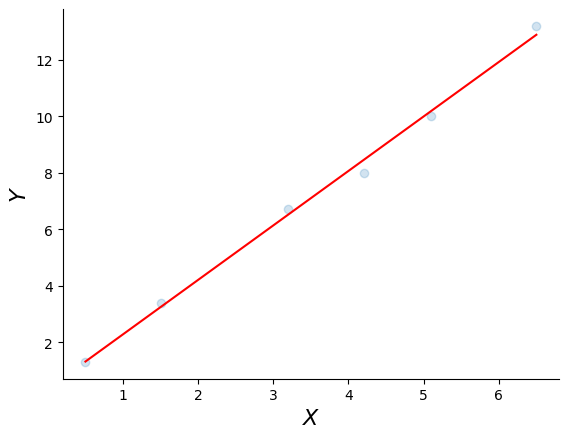

In [3]:
# dados
df = pd.DataFrame({'X': [0.5,1.5,3.2,4.2,5.1,6.5],
                   'Y': [1.3,3.4,6.7,8.0,10.0,13.2]})

Y = df['Y']
X = df['X']
X = sm.add_constant(X)

# inicializando as classes do statsmodel e ajustando o modelo.
model = sm.OLS(Y,X)
results = model.fit()
model_prediction = results.predict(X[['const','X']])

fig = plt.figure()


plt.plot(X['X'],Y,'o',color='C0',alpha=0.2,label=r'Dados')
plt.plot(X['X'],model_prediction,'r-')
plt.xlabel(r'$X$',fontsize=16)
plt.ylabel(r'$Y$',fontsize=16)

for ax in fig.get_axes():

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


plt.show()

In [4]:
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     953.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           6.56e-06
Time:                        17:16:28   Log-Likelihood:               -0.33308
No. Observations:                   6   AIC:                             4.666
Df Residuals:                       4   BIC:                             4.250
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3492      0.253      1.378      0.240      -0.354       1.053
X              1.9288      0.062     30.871      0.000       1.755       2.102
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.897
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.534
Skew:                          -0.570   Prob(JB):                        0.766
Kurtosis:                       2.086   Cond. No.                         8.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## b)

In [5]:
results.params

const    0.349204
X        1.928799
dtype: float64

In [6]:
results.bse

const    0.253329
X        0.062479
dtype: float64

In [7]:
t_beta0 = results.params['const']/results.bse['const']
t_beta0

1.3784599881744644

In [8]:
hypothesis = 'const = 0' # Hipótese nula
t_test = results.t_test(hypothesis)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.3492      0.253      1.378      0.240      -0.354       1.053


In [35]:
t = abs(stats.t.ppf(0.05,4))
t

2.1318467813362907

Uma vez que $t=2.132 > 1.378=t^*$, não se rejeita $H_0:{{\beta}_0} = 0$, com 90% de confiança.

# **Questão 8**

### a)

Neste problema, queremos determinar a idades dos moluscos do gênero Haliotis com base no tamanho de suas conchas. Uma atividade complexa, uma vez que o crescimento desses indivíduos não depende apenas de seu tempo de vida, mas também da disponibilidade de alimento.

A hipótese que verificaremos é que existe uma relação linear entre altura da concha e idade do molusco (n° de anéis), em que conchas maiores indicam maior tempo de vida. Para isso, consideramos um modelo de regressão linear simples com
erros normais.

### b)

In [13]:
molusco = pd.read_csv('molusco.csv')

In [14]:
molusco.head(20)

,Height,Rings
0,0.095,15
1,0.090,7
2,0.135,9
3,0.125,10
4,0.080,7
5,0.095,8
6,0.150,20
7,0.125,16
8,0.125,9
9,0.150,19


In [15]:
molusco.describe()

,Height,Rings
count,4177.000000,4177.000000
mean,0.139516,9.933684
std,0.041827,3.224169
min,0.000000,1.000000
25%,0.115000,8.000000
50%,0.140000,9.000000
75%,0.165000,11.000000
max,1.130000,29.000000


In [16]:
molusco['Height'].var()

0.0017495026644267044

In [17]:
molusco['Rings'].var()

10.395265947347132

Em nossa base temos a variável contínua "Height" (Altura) que aqui nos é dada em milímetros $(mm)$.

Text(0.5, 0, 'Altura $(mm)$')

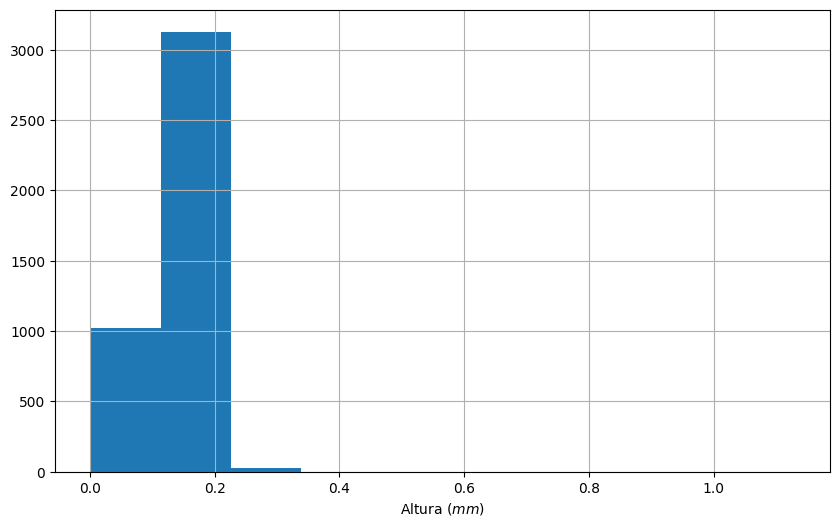

In [47]:
#Distribuição de frequências da altura
plt.figure(figsize=(10, 6))
molusco['Height'].hist()
plt.xlabel('Altura $(mm)$')

Text(0.5, 0, 'N° de anéis')

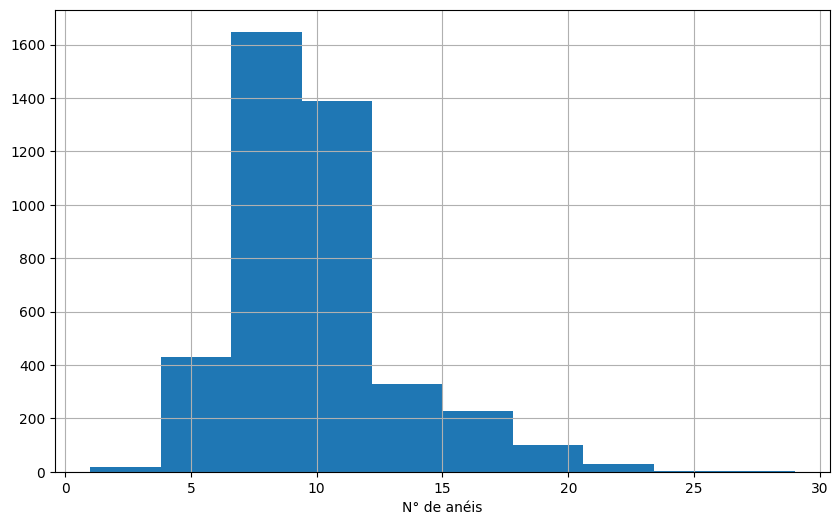

In [38]:
#Distribuição de frequências do n° de anéis
plt.figure(figsize=(10, 6))
molusco['Rings'].hist()
plt.xlabel('N° de anéis')

### c)

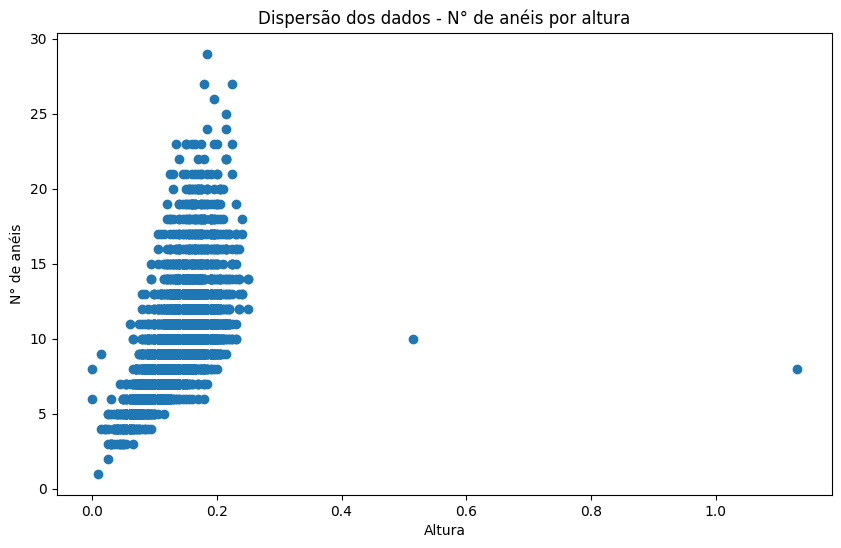

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(molusco['Height'],molusco['Rings'])
plt.xlabel('Altura (mm)')
plt.ylabel('N° de anéis')
plt.title('Dispersão dos dados - N° de anéis por altura')
plt.show()

Vê-se que a dispersão dos dados é esparsa, podendo um modelo linear não ser suficiente para explicá-la.

### d) & e)

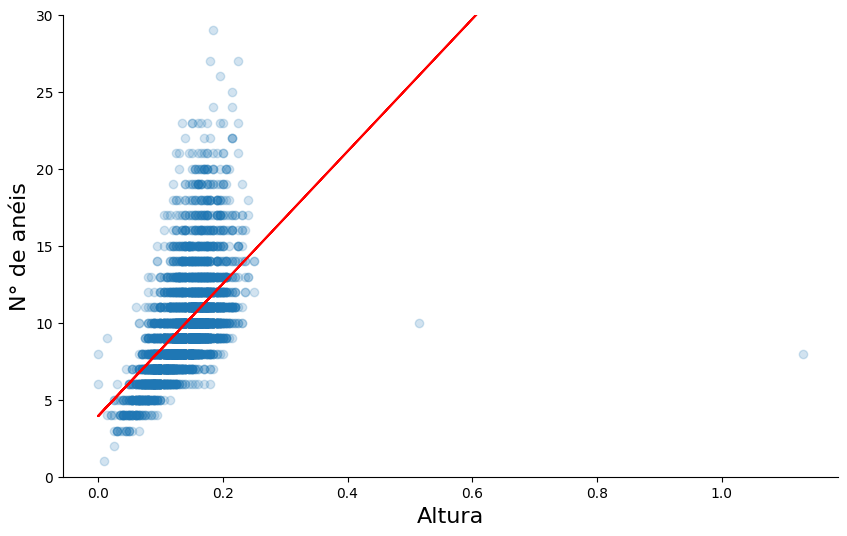

In [21]:
Y = molusco['Rings']
X = molusco['Height']
X = sm.add_constant(X)

# inicializando as classes do statsmodel e ajustando o modelo.
model = sm.OLS(Y,X)
results = model.fit()
model_prediction = results.predict(X[['const','Height']])

fig = plt.figure(figsize=(10, 6))


plt.plot(X['Height'],Y,'o',color='C0',alpha=0.2,label=r'Dados')
plt.plot(X['Height'],model_prediction,'r-')
plt.xlabel('Altura',fontsize=16)
plt.ylabel('N° de anéis',fontsize=16)
plt.ylim(0, 30)

for ax in fig.get_axes():

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


plt.show()

Como suposto na alternativa anterior, o modelo de regressão linear não aparenta se ajustar bem aos dados, não sendo capaz de explicá-los.

### f)

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     1882.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:29:59   Log-Likelihood:                -10039.
No. Observations:                4177   AIC:                         2.008e+04
Df Residuals:                    4175   BIC:                         2.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9385      0.144     27.302      0.000       3.656       4.221
Height        42.9714      0.990     43.388      0.000      41.030      44.913
==============================================================================
Omnibus:                     1152.248   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80909.975
Skew:                           0.369   Prob(JB):                         0.00
Kurtosis:                      24.549   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Por meio desta função podemos visualizar o intervalo de 95% de confiança para os estimadores dos parâmetros. Assim, com probabilidade $0.95$, ${{\beta}_0} ∈ [3.656,4.221]$ ou, com probabilidade $0.05$, ${{\beta}_0} ∉ [3.656,4.221]$. Similarmente, com probabilidade $0.95$, ${{\beta}_1} ∈ [41.030,44.913]$ ou, com probabilidade $0.05$, ${{\beta}_1} ∉ [41.030,44.913]$.

### g)

In [50]:
# coeficiente de correlação entre o preditor e a variável resposta
np.corrcoef(molusco['Height'],molusco['Rings'])

array([[1.        , 0.55746732],
       [0.55746732, 1.        ]])

In [56]:
# covariância entre o preditor e a variável resposta
np.cov(molusco['Height'],molusco['Rings'])

array([[1.74950266e-03, 7.51786501e-02],
       [7.51786501e-02, 1.03952659e+01]])

In [53]:
t_beta1 = results.params['Height']/results.bse['Height']
t_beta1

43.3875885269123

In [52]:
hypothesis = 'Height = 0' # Hipótese nula
t_test = results.t_test(hypothesis)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.9714      0.990     43.388      0.000      41.030      44.913


In [55]:
t = abs(stats.t.ppf(0.025,4175))
t

1.9605323551806586

Uma vez que $t=1.951 << 43.388=t^*$ e $(P>|t|) < {\alpha}$, com 95% de confiança, rejeita-se $H_0:{{\beta}_1} = 0$, ou seja, rejeita-se a hipótese de que não há uma relação estatı́stica significante entre altura e número de anéis (e, portanto, tempo de vida) dos moluscos.

### h)

In [26]:
num_aneis = results.params['const'] + results.params['Height']*0.128
num_aneis

9.43880819131576

In [29]:
# Valor da altura para a qual queremos fazer a estimativa
new_height = 0.128

# novo conjunto de dados com a altura desejada
new_height = sm.add_constant(pd.Series([1, new_height]))

# previsão para o número médio de anéis com altura 0.128
prediction = results.predict(new_height)

# Intervalo de confiança de 95% para a estimativa
confidence_interval = results.get_prediction(new_height).conf_int()

print(f"Estimativa Pontual: {prediction[1]}")
print(f"Intervalo de Confiança (95%): [{confidence_interval[1][0]}, {confidence_interval[1][1]}]")


Estimativa Pontual: 9.43880819131576
Intervalo de Confiança (95%): [9.354578558075518, 9.523037824556]


### i)

In [42]:
num_aneis = results.params['const'] + results.params['Height']*0.132
num_aneis

9.610693954235604

In [45]:
# Valor da altura para a qual queremos fazer a previsão
new_height = 0.132

# Crie um novo conjunto de dados com a altura desejada
new_height = sm.add_constant(pd.Series([1, new_height]))

# Previsão para o número de anéis com altura 0.132
prediction = results.get_prediction(new_height).summary_frame(alpha=0.01)

# Intervalo de predição
print(f"Valor Previsto: {prediction['mean'][1]}")
print(f"Intervalo de Predição (99%): [{prediction['obs_ci_lower'][1]}, {prediction['obs_ci_upper'][1]}]")


Valor Previsto: 9.610693954235604
Intervalo de Predição (99%): [2.7111357889891305, 16.510252119482075]


### j)

Por meio da análise do modelo e seus coeficientes estimados, pudemos ver que há de fato uma relação positiva entre a altura do molusco e sua idade, identificada pelo n° de anéis. Todavia, apenas o modelo linear considerando a variável altura como única preditora não se mostrou suficiente para este caso, resultando em um ajuste ruim da reta. Desse modo, concluímos que há sim uma relação entre as variáveis, como proposto pela hipótese, entretanto, a utilização de outras variáveis preditoras junto da altura são necessárias para a resolução deste problema de prever a idade dos moluscos, tais como padrões climáticos, localização e consequente disponibilidade de alimento.